# Project 1

Luke Sturgeon  
Stat 517-01  
Due Date: 9/20/18

## Question 1  

This question is trying to predict what a job salary will be based on data given in the jobs advertisement. The data has been processed so that salary is specified as above or below $50k a year. Below are the various methods that could be used to classify the job advertisements and their calculated accuracy on their training and testing data sets. The original (pre-processed) data set has also been imported. It's much easier to do some exploratory data analysis on data when the categorical variables are kept in one column with many levels rather than split into many columns with a dichotomous 0,1 value. I've had to remove some code blocks to get this project to fit the 20 page minimum. Please see my github repository for the full version. In particular, some models had to be taken out completely such as SVC and Simply Tree Classification.

## The Set Up  
The following code will be used in most of the procedures for Question 1 and 2

In [28]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
salary = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/adult_preprocessed.csv")

In [29]:
salary_og = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")

In [4]:
salary_og.shape

(10000, 12)

How I split my data into training and testing, was way too complicated and took too much room to include in the printed version of my project. Please see the version on my github for how I made a simple task hard.

## Exploratory Data Analysis  
Below are a few graphs to give use a general idea of how the data is behaving.

Text(0.5,1,'Count of Observations')

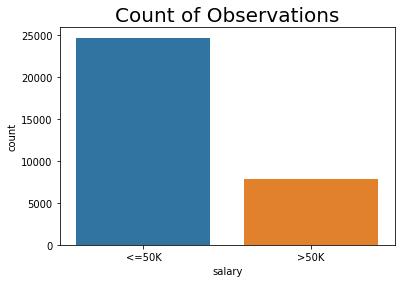

In [6]:
sb.countplot(salary.salary)
plt.title("Count of Observations", color = "black", fontsize=20)

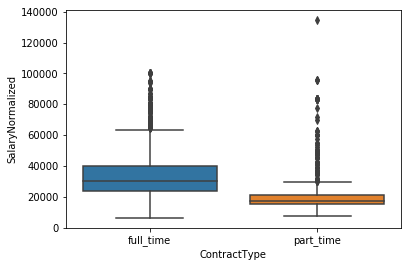

In [7]:
sb.boxplot(x='ContractType', y='SalaryNormalized',data=salary_og)

[Text(0,0,'Engineering Jobs'),
 Text(0,0,'HR & Recruitment Jobs'),
 Text(0,0,'Accounting & Finance Jobs'),
 Text(0,0,'Healthcare & Nursing Jobs'),
 Text(0,0,'Other/General Jobs'),
 Text(0,0,'Hospitality & Catering Jobs'),
 Text(0,0,'IT Jobs'),
 Text(0,0,'Customer Services Jobs'),
 Text(0,0,'Travel Jobs'),
 Text(0,0,'Sales Jobs'),
 Text(0,0,'Manufacturing Jobs'),
 Text(0,0,'Teaching Jobs'),
 Text(0,0,'Creative & Design Jobs'),
 Text(0,0,'Trade & Construction Jobs'),
 Text(0,0,'Property Jobs'),
 Text(0,0,'Admin Jobs'),
 Text(0,0,'Legal Jobs'),
 Text(0,0,'Retail Jobs'),
 Text(0,0,'Consultancy Jobs'),
 Text(0,0,'Energy, Oil & Gas Jobs'),
 Text(0,0,'Logistics & Warehouse Jobs'),
 Text(0,0,'PR, Advertising & Marketing Jobs'),
 Text(0,0,'Charity & Voluntary Jobs'),
 Text(0,0,'Scientific & QA Jobs'),
 Text(0,0,'Maintenance Jobs'),
 Text(0,0,'Domestic help & Cleaning Jobs'),
 Text(0,0,'Social work Jobs'),
 Text(0,0,'Graduate Jobs')]

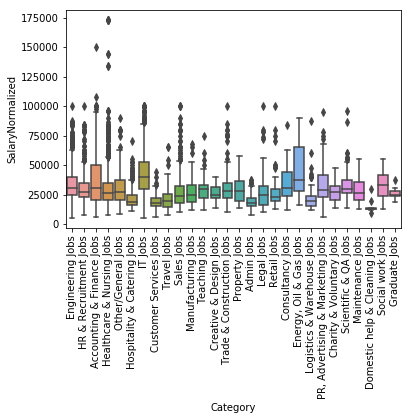

In [8]:
category_boxplot = sb.boxplot(x='Category',y='SalaryNormalized',data=salary_og)
category_boxplot.set_xticklabels(category_boxplot.get_xticklabels(),rotation=90)

The graphs show we do have variation between a few of our categorical variables that could give us enough information to generate a model that could accurately tease apart which observation belongs in the over or under $50/year group. The frequency chart also shows us that we have enough observations within each category to be able to use the sklearn.metrics tools to evaluate how accurate the models that will be generated are instead of being forced to rely on an ROC measure.

## Logistic Regression
To try and improve these ratings, I've tried to fine tune the model by playing with the cache size of the model.

In [9]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Training set score: 0.80
Test set score: 0.80
Number of features used: 97


In [10]:
lr10 = LogisticRegression(C=10)
lr10.fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr10.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.80


In [11]:
lr100 = LogisticRegression(C=100)
lr100.fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr100.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.80


In [12]:
lr001 = LogisticRegression(C=0.001)
lr001.fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr001.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.80


## k-Nearest Neighbors  
I played with how many points to drop into the data set. The number of points is shown by "n = .." in the code, n=3, 7, 10 respectively for the following code blocks.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print("Train set predictions n = 3: {}".format(clf.predict(X_train)))
print("Train set accuracy n = 3: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set predictions n = 3: {}".format(clf.predict(X_test)))
print("Test set accuracy n = 3: {:.2f}".format(clf.score(X_test, y_test)))

Train set predictions n = 3: ['<=50K' '<=50K' '<=50K' ... '>50K' '<=50K' '>50K']
Train set accuracy n = 3: 0.86
Test set predictions n = 3: ['<=50K' '<=50K' '>50K' ... '<=50K' '<=50K' '>50K']
Test set accuracy n = 3: 0.76


In [14]:
clf7 = KNeighborsClassifier(n_neighbors=7)

clf7.fit(X_train, y_train)
print("Train set predictions n = 7: {}".format(clf7.predict(X_train)))
print("Train set accuracy n = 7: {:.2f}".format(clf7.score(X_train, y_train)))
print("Test set predictions n = 7: {}".format(clf7.predict(X_test)))
print("Test set accuracy n = 7: {:.2f}".format(clf7.score(X_test, y_test)))

Train set predictions n = 7: ['<=50K' '<=50K' '<=50K' ... '>50K' '<=50K' '<=50K']
Train set accuracy n = 7: 0.82
Test set predictions n = 7: ['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']
Test set accuracy n = 7: 0.79


In [15]:
clf10 = KNeighborsClassifier(n_neighbors=10)

clf10.fit(X_train, y_train)
print("Train set predictions n = 10: {}".format(clf10.predict(X_train)))
print("Train set accuracy n = 10: {:.2f}".format(clf10.score(X_train, y_train)))
print("Test set predictions n = 10: {}".format(clf10.predict(X_test)))
print("Test set accuracy n = 10: {:.2f}".format(clf10.score(X_test, y_test)))

Train set predictions n = 10: ['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']
Train set accuracy n = 10: 0.81
Test set predictions n = 10: ['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']
Test set accuracy n = 10: 0.80


## Random Forest Classifier   
Building on our decision trees, we can average together what multiple decision trees have found. To keep our trees from digressing too far away from what the day is showing, the testing training set is bootstrapped and randomly sampled. A tree is then built on that bootstrapped data. A second tree is built on a second random sampling of the bootstrapped data, with replacement from the first sampling though. This way the second tree isn't left with only the least likely choices that weren't picked from the first sampling. The success rates between trees are averaged and given in the results of the code blocks below. All trees have been allowed to keep branching until leaves are pure (can't branch any further, we've run out of decisions). Number of trees in the forest are 5, 10, and 100 respectively for the following code blocks.

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest5 = RandomForestClassifier(n_estimators=5, random_state=2)
forest5.fit(X_train, y_train)
print("Accuracy on training set # of trees = 5: {:.3f}".format(forest5.score(X_train, y_train)))
print("Accuracy on test set # of trees = 5: {:.3f}".format(forest5.score(X_test, y_test)))

Accuracy on training set # of trees = 5: 0.980
Accuracy on test set # of trees = 5: 0.845


In [20]:
forest10 = RandomForestClassifier(n_estimators=10, random_state=2)
forest10.fit(X_train, y_train)
print("Accuracy on training set # of trees = 10: {:.3f}".format(forest10.score(X_train, y_train)))
print("Accuracy on test set # of trees = 10: {:.3f}".format(forest10.score(X_test, y_test)))

Accuracy on training set # of trees = 10: 0.987
Accuracy on test set # of trees = 10: 0.853


In [21]:
forest100 = RandomForestClassifier(n_estimators=100, random_state=2)
forest100.fit(X_train, y_train)
print("Accuracy on training set # of trees = 100: {:.3f}".format(forest100.score(X_train, y_train)))
print("Accuracy on test set # of trees = 100: {:.3f}".format(forest100.score(X_test, y_test)))

Accuracy on training set # of trees = 100: 1.000
Accuracy on test set # of trees = 100: 0.859


## Neural Networks

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.24
Accuracy on test set: 0.24


Not very satisfied with this, think this can do better. Playing with the "solver" and the number of hidden layers may improve this. This first code block will have 3 hidden layers with 96 (the number of variables in our data set) nodes in each.

In [23]:
mlp3 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(96,96,96)).fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp3.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.76


In [24]:
mlp10 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(96,96,96,96,96,96,96,96,96,96)).fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp10.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp10.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.76


Increasing the hidden layers seems to not be doing much and it's much taking longer for the computer to calculate it as well.

## Naive-Bayes
We'll look at the Gaussian, Multinomial and Bernoulli version of the Naive-Bayes classification. Since the data in this first problem is more often than not binary, the Bernoulli version should be best since, as the name implies, it uses a Bernoulli distribution to find the probability of being classified as one or the other.

In [25]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Accuracy on training set: 0.79
Accuracy on test set: 0.79
Number of features used: 97


In [26]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mnb.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mnb.score(X_train, y_train)))

Accuracy on training set: 0.78
Accuracy on test set: 0.78


In [27]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(bnb.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(bnb.score(X_train, y_train)))

Accuracy on training set: 0.82
Accuracy on test set: 0.82


## Conclusion  
The random forest model turned out to be the best at classifying whether or not a U.S. citizen earns above or below $50k a year. This classifying model is one of the quickest and most flexible. Its underlying structure allows it to go through large datasets quickly since the model is simply splitting the data over and over again with yes/no decisions. Since these yes/no decisions don't follow an assumed probability distribution, this method is also non-parametric, allowing us to do away with a few of the constraining assumptions that methods like logistic regression or Naive-Bayes force us to assume (normally distributed errors and independent variables, respectively).

The largest issue with this method is that the results aren't easily interpretable. This model does a great job telling us which category a person belongs. Figuring out which decision was most influential in putting that person into a category is more intractable. We have to follow the decision path from the beginning all the way down to the leaf the observation resides. A logistic regression which I previously poo pooed is much better at this, giving us coefficients for each variable to show how that variable is weighted in the model.

# Question 2  

Spoiler Alert: ROC measurements don't like to work with 'object' data types. Our predicted variable is just that ("Purchase") and needs to be converted to a type that it will work with. I have to admit that I got tired of American food and had to switch to Chinese. I took the data set that was given to us at "http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv" and manipulated it in R so that the 'Purchase' variable was converted into 0,1 for No, Yes respectively. I've included the R code below, then uploaded the manipulated dataset to my github before importing it into this notebook.

In [118]:
# caravan <- read.csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
# View(caravan)
# class(caravan$Purchase)
# [1] "factor"
# Purchase <- caravan$Purchase
# Purchase <- ifelse(Purchase=="Yes",1,0)
# caravan$Purchase <- Purchase
# write.csv(caravan,file="caravan_data_proc.csv")

When importing a .csv that was created in R, Python likes to add a column at the beginning of the dataset. This 'Unnamed: 0' column has to be dropped so that what turns out to be an index isn't treated as a predictor for all of the following calculations. This was found out the hard way when I got to the 'predict_proba' part of this question and found that the model I had built and trained was based on one variable more than the new test data set.

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
caravan = pd.read_csv("https://raw.githubusercontent.com/CryHavyk/Stat517/master/caravan_data_proc.csv")
caravan = caravan.drop('Unnamed: 0',axis=1)

In [209]:
X_caravan = caravan.drop('Purchase',axis=1)
X_caravan.shape

(4630, 85)

In [210]:
y_caravan = caravan['Purchase']
y_caravan.shape

(4630L,)

In [211]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_caravan, y_caravan, random_state=42)

## Exploratory Data Analysis
Below are some charts to see what the data looks like hopefully giving us an idea on how best to model it in the following sections. 

Text(0.5,1,'Purchased Insurance or Not')

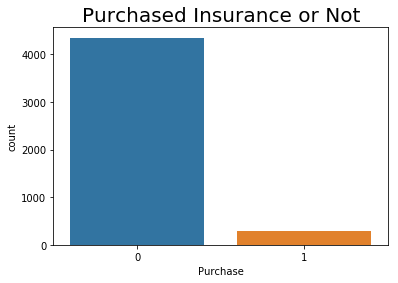

In [212]:
sb.countplot(caravan.Purchase)
plt.title("Purchased Insurance or Not",color = "black", fontsize = 20)

Without any more metadata on what the variables within the dataset are, it's hard to do any more exploratory data analysis. The graphs would be gibberish since we don't know what we're comparing to if they purchased insurance or not. But, based on the frequency plot above, it appears that we have a very skewed data set. Our usual accuracy measures will not be sufficient to tell us if the model is predicting accurately since even a blanket answer of "No" would give us approximately 0.95 accuracy. The area under the ROC curve will be used instead. 

## k-Nearest Neighbors  
Although the accuracies are almost meaningless, it still does my heart good to see a hugely accurate model. I've attempted to better fit the model by playing with the number of points to drop in the data. The real measure of accuracy, 'roc_auc_score' is used below.

In [213]:
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train2, y_train2)
print("Train set predictions n = 3: {}".format(clf.predict(X_train2)))
print("Train set accuracy n = 3: {:.2f}".format(clf.score(X_train2, y_train2)))
print("Test set predictions n = 3: {}".format(clf.predict(X_test2)))
print("Test set accuracy n = 3: {:.2f}".format(clf.score(X_test2, y_test2)))

Train set predictions n = 3: [0 0 0 ... 0 1 0]
Train set accuracy n = 3: 0.95
Test set predictions n = 3: [0 1 0 ... 0 0 0]
Test set accuracy n = 3: 0.92


In [214]:
y_model = clf.predict(X_test2)
roc_auc_score(y_test2, y_model)

0.5110974634369287

In [215]:
y_model_train = clf.predict(X_train2)
roc_auc_score(y_train2, y_model_train)

0.6048194118304819

In [216]:
clf10 = KNeighborsClassifier(n_neighbors = 10)
clf10.fit(X_train2, y_train2)
y_model_test = clf10.predict(X_test2)
roc_auc_score(y_test2, y_model_test)

0.5

In [217]:
y_model_train = clf10.predict(X_train2)
roc_auc_score(y_train2, y_model_train)

0.5

In [218]:
clf2 = KNeighborsClassifier(n_neighbors = 2)
clf2.fit(X_train2, y_train2)
y_model_test = clf2.predict(X_test2)
roc_auc_score(y_test2, y_model_test)

0.5105975776965266

In [219]:
y_model_train = clf2.predict(X_train2)
roc_auc_score(y_train2, y_model_train)

0.5725735211897574

## Logistic Regression  
Manipulating the cache size didn't do much in the first problem. I'm going to try a different solver. In the notation when LogisticRegression? is entered, it mentions that 'liblinear' doesn't support multinomial loss and there is a chance 'sag' and 'saga' won't converge fast enough, so 'lbfgs' seems to be the best option.

In [220]:
lr = LogisticRegression()
lr.fit(X_train2,y_train2)
print("Training set score: {:.2f}".format(lr.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(lr.score(X_test2, y_test2)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))
y_model_test = lr.predict(X_test2)
roc_auc_score(y_test2, y_model_test)

Training set score: 0.94
Test set score: 0.94
Number of features used: 85


0.4977148080438757

In [221]:
y_model_train = lr.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.5130213574863022

In [222]:
lr_tuned = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr_tuned.fit(X_train2,y_train2)
y_model_test = lr_tuned.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.5064413848263254

In [223]:
y_model_train = lr_tuned.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.5128676059487868

In [224]:
lr_tuned100 = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr_tuned100.fit(X_train2,y_train2)
y_model_test = lr_tuned100.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.5064413848263254

In [225]:
y_model_train = lr_tuned100.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.5128676059487868

## Random Forest Classifier  
As in the first problem, a collection of trees generated from randomly selected, with replacement, bootstrapped data were averaged in an attempt to get the most accurate predictive model possible. The number of trees used was manipulated to fine tune the model.

In [232]:
forest5 = RandomForestClassifier(n_estimators=5, random_state=2)
forest5.fit(X_train2, y_train2)
print("Accuracy on training set # of trees = 5: {:.3f}".format(forest5.score(X_train2, y_train2)))
print("Accuracy on test set # of trees = 5: {:.3f}".format(forest5.score(X_test2, y_test2)))
y_model_test = forest5.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

Accuracy on training set # of trees = 5: 0.981
Accuracy on test set # of trees = 5: 0.919


0.5157106946983547

In [233]:
y_model_train = forest5.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.8733087330873308

In [234]:
forest10 = RandomForestClassifier(n_estimators=10, random_state=2)
forest10.fit(X_train2, y_train2)
y_model_test = forest10.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.5216521937842779

In [235]:
y_model_train = forest10.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.8718047635021805

In [236]:
forest100 = RandomForestClassifier(n_estimators=100, random_state=2)
forest100.fit(X_train2, y_train2)
y_model_test = forest100.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.5046560786106032

In [237]:
y_model_train = forest100.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.9563569272056357

## Neural Networks  
Attempted to fine tune the model by changing the number of hidden layers between the input and output, but nothing seems to budge for this model.

In [238]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train2, y_train2)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train2, y_train2)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test2, y_test2)))
y_model_test = mlp.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

Accuracy on training set: 0.98
Accuracy on test set: 0.89


0.5079838893967094

In [239]:
y_model_train = mlp.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.8620653024712066

In [240]:
mlp3 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(86,86,86)).fit(X_train2, y_train2)
y_model_test = mlp3.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.5553159277879343

In [241]:
y_model_train = mlp3.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.8698059935144806

In [242]:
mlp10 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(86,86,86,86,86,86,86,86,86,86)).fit(X_train2, y_train2)
y_model_test = mlp10.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.5424331581352834

In [243]:
y_model_train = mlp10.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.8994716538074472

## Naive-Bayes  
Naive-Bayes methods were fine tuned by selected which distribution to use as in the first problem. This method seems to be the best for prediction (best being relative). Since Naive-Bayes assumes that the variables are independent of each other, a correlation matrix between the variables would be interesting to look at to see how true this assumption would be. 

In [244]:
gnb = GaussianNB()
gnb.fit(X_train2, y_train2)
print("Accuracy on training set: {:.2f}".format(gnb.score(X_train2, y_train2)))
print("Accuracy on test set: {:.2f}".format(gnb.score(X_train2, y_train2)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))
y_model_test = gnb.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

Accuracy on training set: 0.17
Accuracy on test set: 0.17
Number of features used: 85


0.5336922989031079

In [245]:
y_model_train = gnb.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.5491809236274181

In [246]:
mnb = MultinomialNB()
mnb.fit(X_train2, y_train2)
y_model_test = mnb.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.6224005941499086

In [247]:
y_model_train = mnb.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.6547802750754781

In [248]:
bnb = BernoulliNB()
bnb.fit(X_train2, y_train2)
y_model_test = bnb.predict(X_test2)
roc_auc_score(y_test2,y_model_test)

0.5507455438756855

In [249]:
y_model_train = bnb.predict(X_train2)
roc_auc_score(y_train2,y_model_train)

0.6122777591412277

## Who to Pick On  
Below is how I decided which 50 clients management should approach first about buying insurance. These 50 people are the most likely to purchase the insurance based on the information given.

In [30]:
chumps = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")

Since Multinomial Naive-Bayes turned out to be the best at predicting correctly who would purchase insurance from the training sub-group of the first dataset given, it will be used to show who is most likely to buy insurance from this second given dataset.

In [251]:
probability = mnb.predict_proba(chumps)[:,1]
print(probability)

[4.23400746e-05 1.35177080e-05 9.99999143e-01 ... 8.13047820e-04
 1.55388736e-08 5.82446108e-03]


In [253]:
chumps['prediction']=probability
chumps.sort_index(by='prediction',ascending=False).head(50)

C:\Users\lukes\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,prediction
30,2,1,3,4,1,1,5,2,3,5,...,0,0,0,1,0,2,0,0,1,1.000000
738,8,1,3,3,2,0,9,0,0,7,...,0,0,0,1,0,0,0,0,1,1.000000
389,3,1,3,4,1,0,7,1,2,7,...,0,0,0,1,0,0,2,0,1,1.000000
423,6,1,4,3,2,1,4,1,4,7,...,0,0,0,1,0,0,0,0,1,1.000000
414,1,1,3,3,1,1,5,0,4,7,...,0,0,0,1,0,0,0,0,1,1.000000
254,12,1,3,2,3,6,3,0,0,9,...,0,0,0,1,0,0,0,0,0,1.000000
866,6,2,4,2,2,0,6,0,3,9,...,1,0,0,1,0,0,0,0,0,1.000000
487,1,1,3,3,1,1,6,0,3,9,...,0,0,0,1,0,0,0,0,0,1.000000
29,6,1,3,3,2,0,7,2,0,9,...,0,0,0,0,0,0,0,0,0,1.000000
765,12,1,3,2,3,6,3,0,0,9,...,0,0,0,1,0,0,0,0,0,1.000000
